In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install tabulate
from tabulate import tabulate
!pip install wordcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

### Airline CSV

In [3]:
airlines = pd.read_csv('../Data/airlines.csv')
airlines.tail()

,Airline ID,Name,Alias,IATA,ICAO,Callsign,Country,Active
6157,21248,GX Airlines,NaN,NaN,CBG,SPRAY,China,Y
6158,21251,Lynx Aviation (L3/SSX),NaN,NaN,SSX,Shasta,United States,N
6159,21268,Jetgo Australia,NaN,JG,\N,NaN,Australia,Y
6160,21270,Air Carnival,NaN,2S,\N,NaN,India,Y
6161,21317,Svyaz Rossiya,Russian Commuter,7R,SJM,RussianConnecty,Russia,Y


In [4]:
airlines.columns

Index(['Airline ID', 'Name', 'Alias', 'IATA', 'ICAO', 'Callsign', 'Country',
       'Active'],
      dtype='object')

In [5]:
#how many rows?
airlines.shape

(6162, 8)

In [6]:
airlines.isnull().sum()

Airline ID       0
Name             0
Alias          506
IATA          4627
ICAO            87
Callsign       808
Country         15
Active           0
dtype: int64

In [7]:
#drop Alias column
airlines.drop('Alias', axis=1, inplace=True)
airlines.drop('Callsign', axis=1, inplace=True)
#airlines.head()

In [8]:
#subset for active airlines
airlines = airlines[airlines['Active']=='Y']
airlines.tail()

,Airline ID,Name,IATA,ICAO,Country,Active
6154,21179,Thai Vietjet Air,NaN,TVJ,Thailand,Y
6157,21248,GX Airlines,NaN,CBG,China,Y
6159,21268,Jetgo Australia,JG,\N,Australia,Y
6160,21270,Air Carnival,2S,\N,India,Y
6161,21317,Svyaz Rossiya,7R,SJM,Russia,Y


In [9]:
airlines.rename(columns = {'Airline ID':'AirLine_ID_al','Name':'Name_al', 'IATA':'IATA_al', 'ICAO':'ICAO_al','Country':'Country_al', 'Active':'Active_al'}, inplace=True)
airlines.head(2)
#unknown and private, etc., will drop out when joined with delays

,AirLine_ID_al,Name_al,IATA_al,ICAO_al,Country_al,Active_al
0,-1,Unknown,-,NaN,\N,Y
1,1,Private flight,-,NaN,NaN,Y


In [10]:
airlines.shape

(1255, 6)

In [11]:
airlines.isnull().sum()

AirLine_ID_al      0
Name_al            0
IATA_al          240
ICAO_al           29
Country_al         2
Active_al          0
dtype: int64

In [12]:
airlines.Name_al.unique()

array(['Unknown', 'Private flight', '1Time Airline', ...,
       'Jetgo Australia', 'Air Carnival', 'Svyaz Rossiya'], dtype=object)

In [13]:
#print(tabulate(airlines, headers='keys', tablefmt='pretty'))

In [14]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

In [15]:
#airlines['newname'] = airlines['Name']
#airlines.head(10)

In [16]:
#airlines['newname'] = airlines['newname'].str.replace('-',' ')
#airlines.head()

In [17]:
#airlines['newname'] = airlines['newname'].str.extract(r'(\w+\s+\w+)')
#airlines.head()

In [32]:
airlines.Name_al.value_counts()

Thomas Cook Airlines    2
Comair                  2
Air Salone              2
Tyrolean Airways        2
Jet Airways             2
                       ..
KD Avia                 1
Juneyao Airlines        1
Jetstar Airways         1
Jetflite                1
Svyaz Rossiya           1
Name: Name_al, Length: 1249, dtype: int64

In [22]:
text = " ".join(review for review in airlines.Name_al.astype(str))

In [23]:
stopwords = set(STOPWORDS)

In [29]:
stopwords.update(["Airline", "Airlines", "Airways", "Aviation", "Air", "International"])

In [30]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

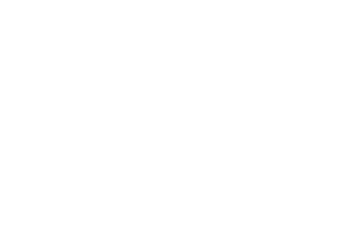

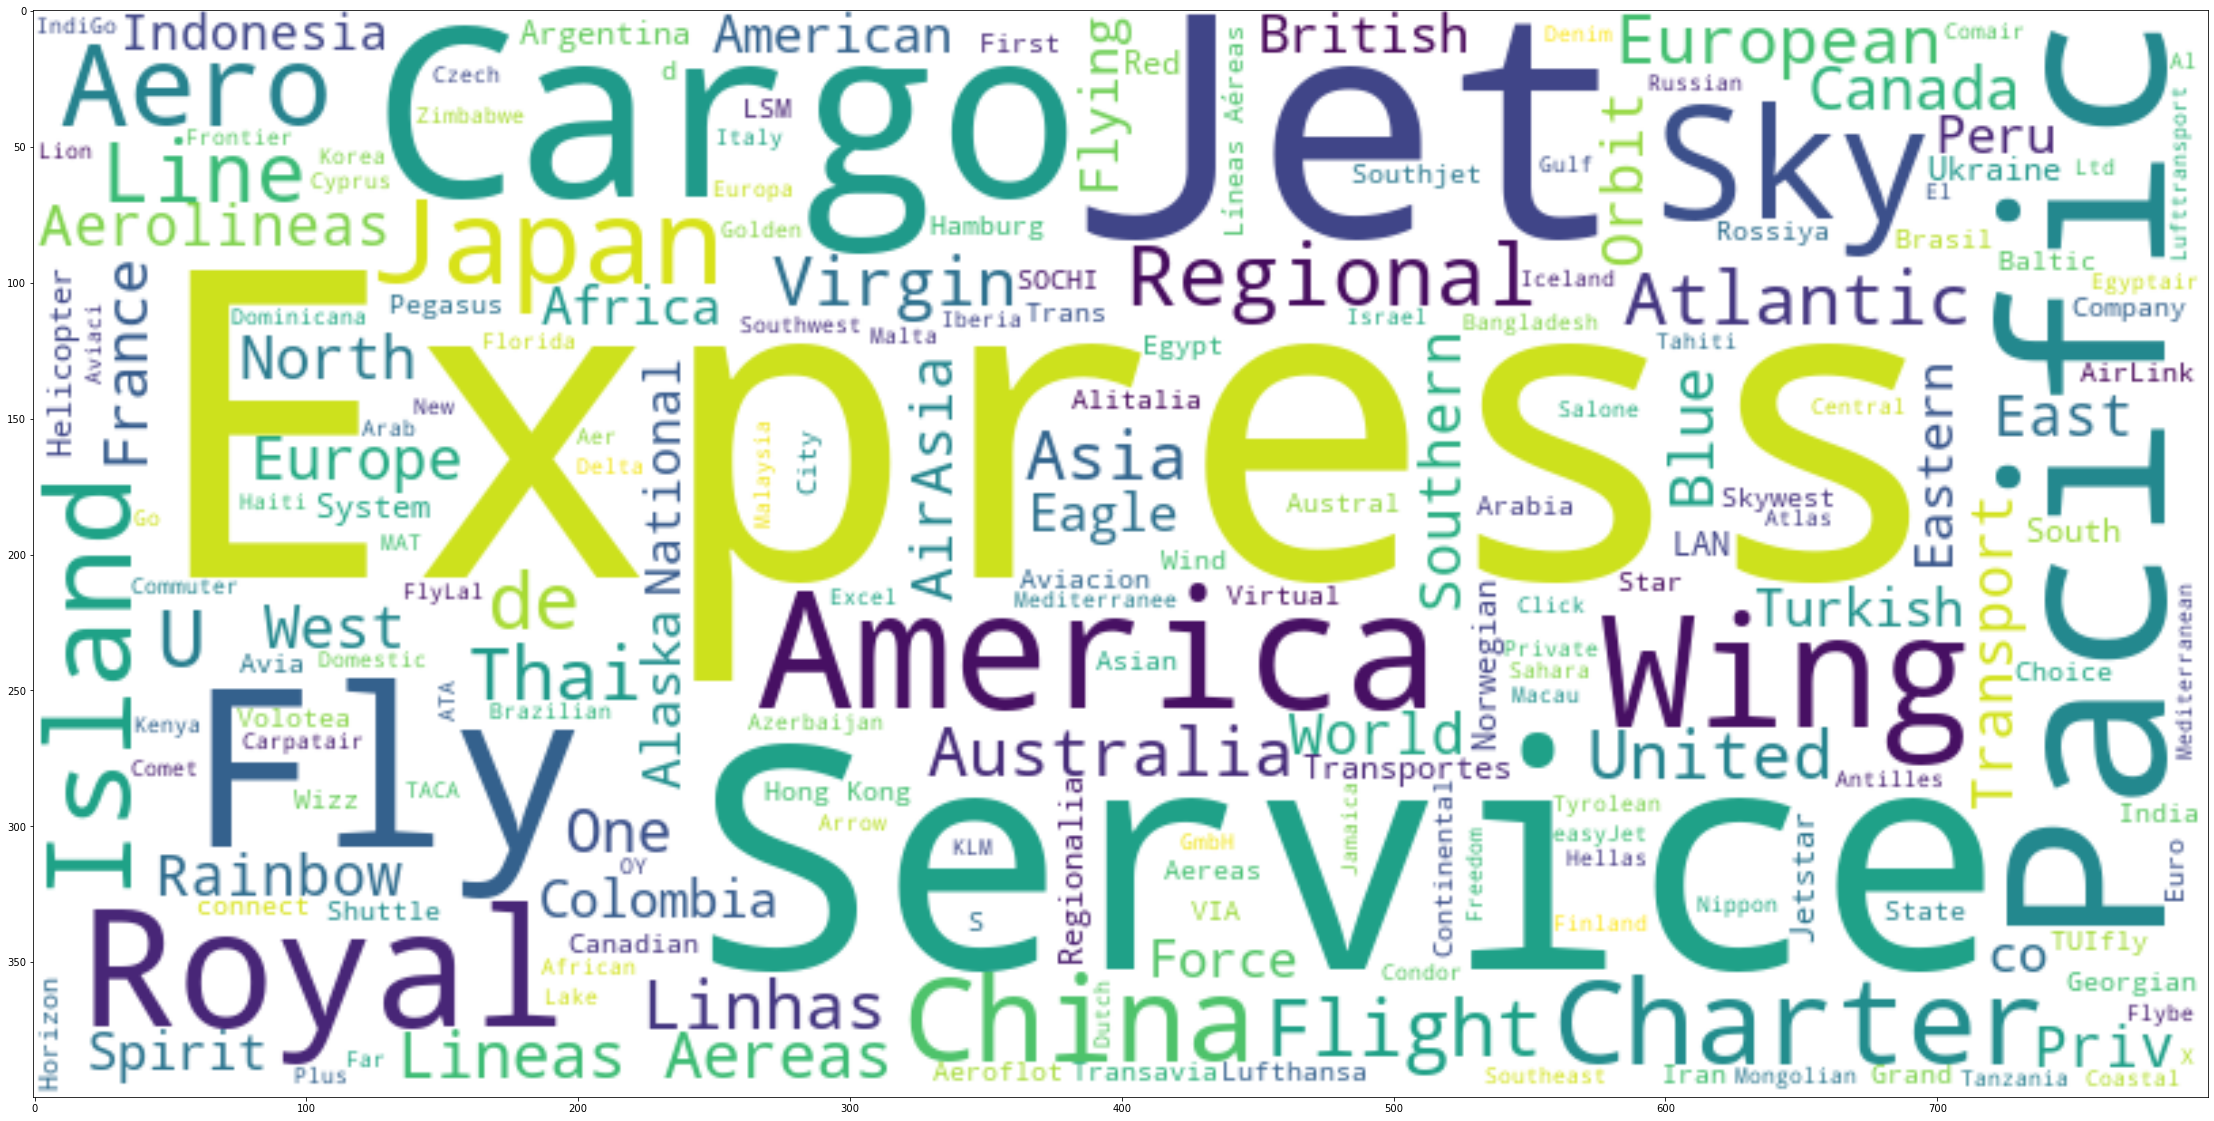

In [31]:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### FAA Regions

In [35]:
FAA_Regions = pd.read_csv('../Data/Federal_Aviation_Administration_FAA_Regions.csv')
FAA_Regions.head(11)

,FID,REGION,CNT_REGION,Shape_Leng,Shape_Area
0,1,New England Region,6,152.233742,19.099946
1,2,Central Region,4,51.318016,78.091215
2,3,Southern Region,8,471.324583,94.856190
3,4,Western Pacific Region,4,94.202014,101.933953
4,5,Southwest Region,5,428.811114,138.650729
5,6,Great Lakes Region,8,189.109110,139.986989
6,7,Eastern Region,8,308.913778,48.682795
7,8,Northwest Mountain Region,7,151.363696,197.475811
8,9,Alaska Region,1,1033.192985,278.612678


In [36]:
FAA_Regions.columns

Index(['FID', 'REGION', 'CNT_REGION', 'Shape_Leng', 'Shape_Area'], dtype='object')

### Airports

In [37]:
airports = pd.read_csv('../Data/Airports.csv')
airports.head()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [38]:
airports.groupby(['Type']).count()

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Source
Type,,,,,,,,,,,,,
airport,7698,7698,7649,7698,7698,7698,7698,7698,7698,7698,7698,7698,7698


In [39]:
airports.columns

Index(['Airport ID', 'Name', 'City', 'Country', 'IATA', 'ICAO', 'Latitude',
       'Longitude', 'Altitude', 'Timezone', 'DST', 'Tz database time zone',
       'Type', 'Source'],
      dtype='object')

In [40]:
airports.drop(['DST', 'Tz database time zone', 'Type', 'Source'], axis=1, inplace=True)
airports.head(2)

,Airport ID,Name,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10


In [41]:
airports.rename(columns = {'Name':'Name_ap', 'Country':'Country_ap','IATA':'IATA_ap', 'ICAO':'ICAO_ap', 'Latitude':'Lat_ap', 'Longitude':'Long_ap', 'Altitude':'Alt_ap', 'Timezone':'TZone_ap'}, inplace=True)
airports.head(2)

,Airport ID,Name_ap,City,Country_ap,IATA_ap,ICAO_ap,Lat_ap,Long_ap,Alt_ap,TZone_ap
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.08169,145.391998,5282,10
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.20708,145.789001,20,10


In [42]:
#airports['Country_ap'].unique()

In [43]:
#subset to United States
airports = airports[airports['Country_ap']=='United States']
airports.head()

,Airport ID,Name_ap,City,Country_ap,IATA_ap,ICAO_ap,Lat_ap,Long_ap,Alt_ap,TZone_ap
3212,3411,Barter Island LRRS Airport,Barter Island,United States,BTI,PABA,70.134003,-143.582001,2,-9
3213,3412,Wainwright Air Station,Fort Wainwright,United States,\N,PAWT,70.613403,-159.860001,35,-9
3214,3413,Cape Lisburne LRRS Airport,Cape Lisburne,United States,LUR,PALU,68.875099,-166.110001,16,-9
3215,3414,Point Lay LRRS Airport,Point Lay,United States,PIZ,PPIZ,69.732903,-163.005005,22,-9
3216,3415,Hilo International Airport,Hilo,United States,ITO,PHTO,19.721399,-155.048004,38,-10


In [44]:
airports.isnull().sum()

Airport ID    0
Name_ap       0
City          0
Country_ap    0
IATA_ap       0
ICAO_ap       0
Lat_ap        0
Long_ap       0
Alt_ap        0
TZone_ap      0
dtype: int64

### Passengers

In [45]:
passengers = pd.read_csv('../Data/US Monthly Air Passengers.csv')
passengers.tail(5)

,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME,YEAR,MONTH
6278815,5,22074.0,Avon Jet AG,MFE,"Mission/McAllen/Edinburg, TX",TX,Texas,US,United States,VCE,"Venice, Italy",NaN,NaN,IT,Italy,2020,3
6278816,2,22074.0,Avon Jet AG,PBI,"West Palm Beach/Palm Beach, FL",FL,Florida,US,United States,FAB,"Farnborough, United Kingdom",NaN,NaN,GB,United Kingdom,2020,3
6278817,6,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,ATH,"Athens, Greece",NaN,NaN,GR,Greece,2020,7
6278818,3,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,FRA,"Frankfurt, Germany",NaN,NaN,DE,Germany,2020,10
6278819,2,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,KEF,"Keflavik/Reykjavik, Iceland",NaN,NaN,IS,Iceland,2020,6


In [46]:
passengers.columns

Index(['Sum_PASSENGERS', 'AIRLINE_ID', 'CARRIER_NAME', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME',
       'YEAR', 'MONTH'],
      dtype='object')

In [47]:
passengers = passengers.loc[:, ['YEAR', 'MONTH', 'Sum_PASSENGERS', 'AIRLINE_ID', 'CARRIER_NAME', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME']]

In [48]:
passengers.tail(2)

,YEAR,MONTH,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME
6278818,2020,10,3,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,FRA,"Frankfurt, Germany",NaN,NaN,DE,Germany
6278819,2020,6,2,22074.0,Avon Jet AG,TEB,"Teterboro, NJ",NJ,New Jersey,US,United States,KEF,"Keflavik/Reykjavik, Iceland",NaN,NaN,IS,Iceland


In [49]:
#limit origin and destination flights within the US
passengers = passengers[(passengers['ORIGIN_COUNTRY']=='US') & (passengers['DEST_COUNTRY']=='US')]
passengers.head(3)

,YEAR,MONTH,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME
0,2015,3,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AEX,"Alexandria, LA",LA,Louisiana,US,United States
1,2015,4,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,AFW,"Dallas/Fort Worth, TX",TX,Texas,US,United States
2,2015,3,0,NaN,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,United States,ATL,"Atlanta, GA",GA,Georgia,US,United States


In [50]:
passengers.CARRIER_NAME.unique()

array([nan, 'Reeve Aleutian Airways Inc.', 'Northwest Airlines Inc.',
       'Southwest Airlines Co.', 'Air Canada',
       'Compagnie Natl Air France', 'Finnair Oy', 'British Airways Plc',
       'British West Indian Airways', 'China Airlines Ltd.',
       'Japan Air Lines Co. Ltd.', 'Klm Royal Dutch Airlines',
       'Polynesian Airlines Ltd.', 'Singapore Airlines Ltd.',
       'Tap-Portuguese Airlines', 'Heavylift Cargo Airlines Lt',
       'Saudi Arabian Airlines Corp', 'Air Sunshine Inc.',
       'Trans-Air-Link Corporation', 'Aloha Airlines Inc.',
       'Virgin Atlantic Airways', 'Horizon Air', 'Hawaiian Airlines Inc.',
       'Continental Air Lines Inc.', 'Delta Air Lines Inc.',
       'American Airlines Inc.', 'Turk Hava Yollari A.O.',
       'Nippon Cargo Airlines', 'Bradley Air Services Ltd.',
       'Air Transport International', 'Emery Worldwide Airlines',
       'Cayman Airways Limited', 'United Parcel Service',
       'Alaska Airlines Inc.', 'Air New Zealand', 'United Ai

In [51]:
passengers.YEAR.min()

2000

In [52]:
passengers.YEAR.max()

2020

In [53]:
#passengers[(passengers['CARRIER_NAME'] == 'Southwest Airlines Co.')]

In [54]:
passengers.tail(1)

,YEAR,MONTH,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME
6278580,2020,6,1,22048.0,Concierge U Ltd. d/b/a Jet Concierge Club,BOS,"Boston, MA",MA,Massachusetts,US,United States,FOK,"Westhampton, NY",NY,New York,US,United States


In [55]:
passengers['AIRLINE_ID'] = passengers['AIRLINE_ID'].fillna(0)

In [56]:
passengers = passengers.astype({'AIRLINE_ID':'int'})
passengers = passengers.astype({'AIRLINE_ID':'str'})
passengers.tail(1)

,YEAR,MONTH,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME
6278580,2020,6,1,22048,Concierge U Ltd. d/b/a Jet Concierge Club,BOS,"Boston, MA",MA,Massachusetts,US,United States,FOK,"Westhampton, NY",NY,New York,US,United States


In [57]:
passengers.dtypes

YEAR                    int64
MONTH                   int64
Sum_PASSENGERS          int64
AIRLINE_ID             object
CARRIER_NAME           object
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_ABR       object
ORIGIN_STATE_NM        object
ORIGIN_COUNTRY         object
ORIGIN_COUNTRY_NAME    object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_ABR         object
DEST_STATE_NM          object
DEST_COUNTRY           object
DEST_COUNTRY_NAME      object
dtype: object

### -------------------------------------------------------------------------------------- end of passengers dataset formatting

### Delays - Airline Delay Cause

In [58]:
delays = pd.read_csv('../Data/Airline_Delay_Cause_2010_20.csv')
delays.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,EV,ExpressJet Airlines LLC,BDL,"Hartford, CT: Bradley International",14.0,4.0,2.00,0.00,...,0.0,2.00,0.0,0.0,114.0,61.0,0.0,0.0,0.0,53.0
1,2019,12,EV,ExpressJet Airlines LLC,BGR,"Bangor, ME: Bangor International",34.0,16.0,4.12,0.00,...,0.0,7.98,2.0,0.0,1450.0,682.0,0.0,231.0,0.0,537.0
2,2019,12,EV,ExpressJet Airlines LLC,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",65.0,13.0,4.52,0.04,...,0.0,2.48,0.0,0.0,572.0,233.0,2.0,206.0,0.0,131.0


In [59]:
delays.year.min()

2010

In [60]:
delays.year.max()

2019

In [61]:
delays.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [62]:
delays.rename(columns = {'year':'year_del', 'month':'month_del', 'carrier':'al_iata_del', 'carrier_name':'carrier_del','airport':'airport_code_del', 'airport_name':'airport_name_del'}, inplace=True)
delays.head(1)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,EV,ExpressJet Airlines LLC,BDL,"Hartford, CT: Bradley International",14.0,4.0,2.0,0.0,...,0.0,2.0,0.0,0.0,114.0,61.0,0.0,0.0,0.0,53.0


In [150]:
inc = delays[delays['carrier_del'] == 'ExpressJet Airlines Inc.']
inc.head(1)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
16277,2019,3,EV,ExpressJet Airlines Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",49.0,18.0,6.02,0.0,...,0.0,7.7,1.0,2.0,1328.0,578.0,0.0,265.0,0.0,485.0


In [151]:
llc = delays[delays['carrier_del'] == 'ExpressJet Airlines LLC']
llc.head(1)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,EV,ExpressJet Airlines LLC,BDL,"Hartford, CT: Bradley International",14.0,4.0,2.0,0.0,...,0.0,2.0,0.0,0.0,114.0,61.0,0.0,0.0,0.0,53.0


In [63]:
#delays['new_carrier_name'] = delays['carrier_name']
#delays.head(2)

In [64]:
#delays['new_carrier_name'] = delays['new_carrier_name'].str.replace('-',' ')
#delays.head(2)

In [65]:
#delays['new_carrier_name'] = delays['new_carrier_name'].str.extract(r'(\w+\s+\w+)')
#delays.head(5)

In [66]:
print(sorted(delays['carrier_del'].unique()))

['AirTran Airways Corporation', 'Alaska Airlines Inc.', 'Allegiant Air', 'American Airlines Inc.', 'American Eagle Airlines Inc.', 'Atlantic Southeast Airlines', 'Comair Inc.', 'Continental Air Lines Inc.', 'Delta Air Lines Inc.', 'Endeavor Air Inc.', 'Envoy Air', 'ExpressJet Airlines Inc.', 'ExpressJet Airlines LLC', 'Frontier Airlines Inc.', 'Hawaiian Airlines Inc.', 'JetBlue Airways', 'Mesa Airlines Inc.', 'PSA Airlines Inc.', 'Pinnacle Airlines Inc.', 'Republic Airline', 'SkyWest Airlines Inc.', 'Southwest Airlines Co.', 'Spirit Air Lines', 'US Airways Inc.', 'United Air Lines Inc.', 'Virgin America']


In [152]:
delays.loc[delays["carrier_del"] == "ExpressJet Airlines LLC", "carrier_del"] = 'ExpressJet Airlines Inc.'

In [153]:
llc = delays[delays['carrier_del'] == 'ExpressJet Airlines LLC']
llc.head(1)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay


In [154]:
inc = delays[delays['carrier_del'] == 'ExpressJet Airlines Inc.']
inc.head(1)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,EV,ExpressJet Airlines Inc.,BDL,"Hartford, CT: Bradley International",14.0,4.0,2.0,0.0,...,0.0,2.0,0.0,0.0,114.0,61.0,0.0,0.0,0.0,53.0


In [155]:
delays.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [68]:
text = " ".join(review for review in delays.carrier_del.astype(str))
print ("There are {} words in the combination of all cells in column carrier_del.".format(len(text)))

There are 3355838 words in the combination of all cells in column carrier_del.


In [69]:
stopwords = set(STOPWORDS)

In [73]:
stopwords.update(["Airline", "Airlines", "Airways", "Aviation", "Air", "Lines", "Inc", "International"])

In [74]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

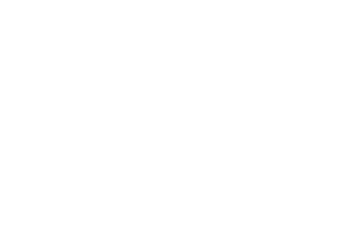

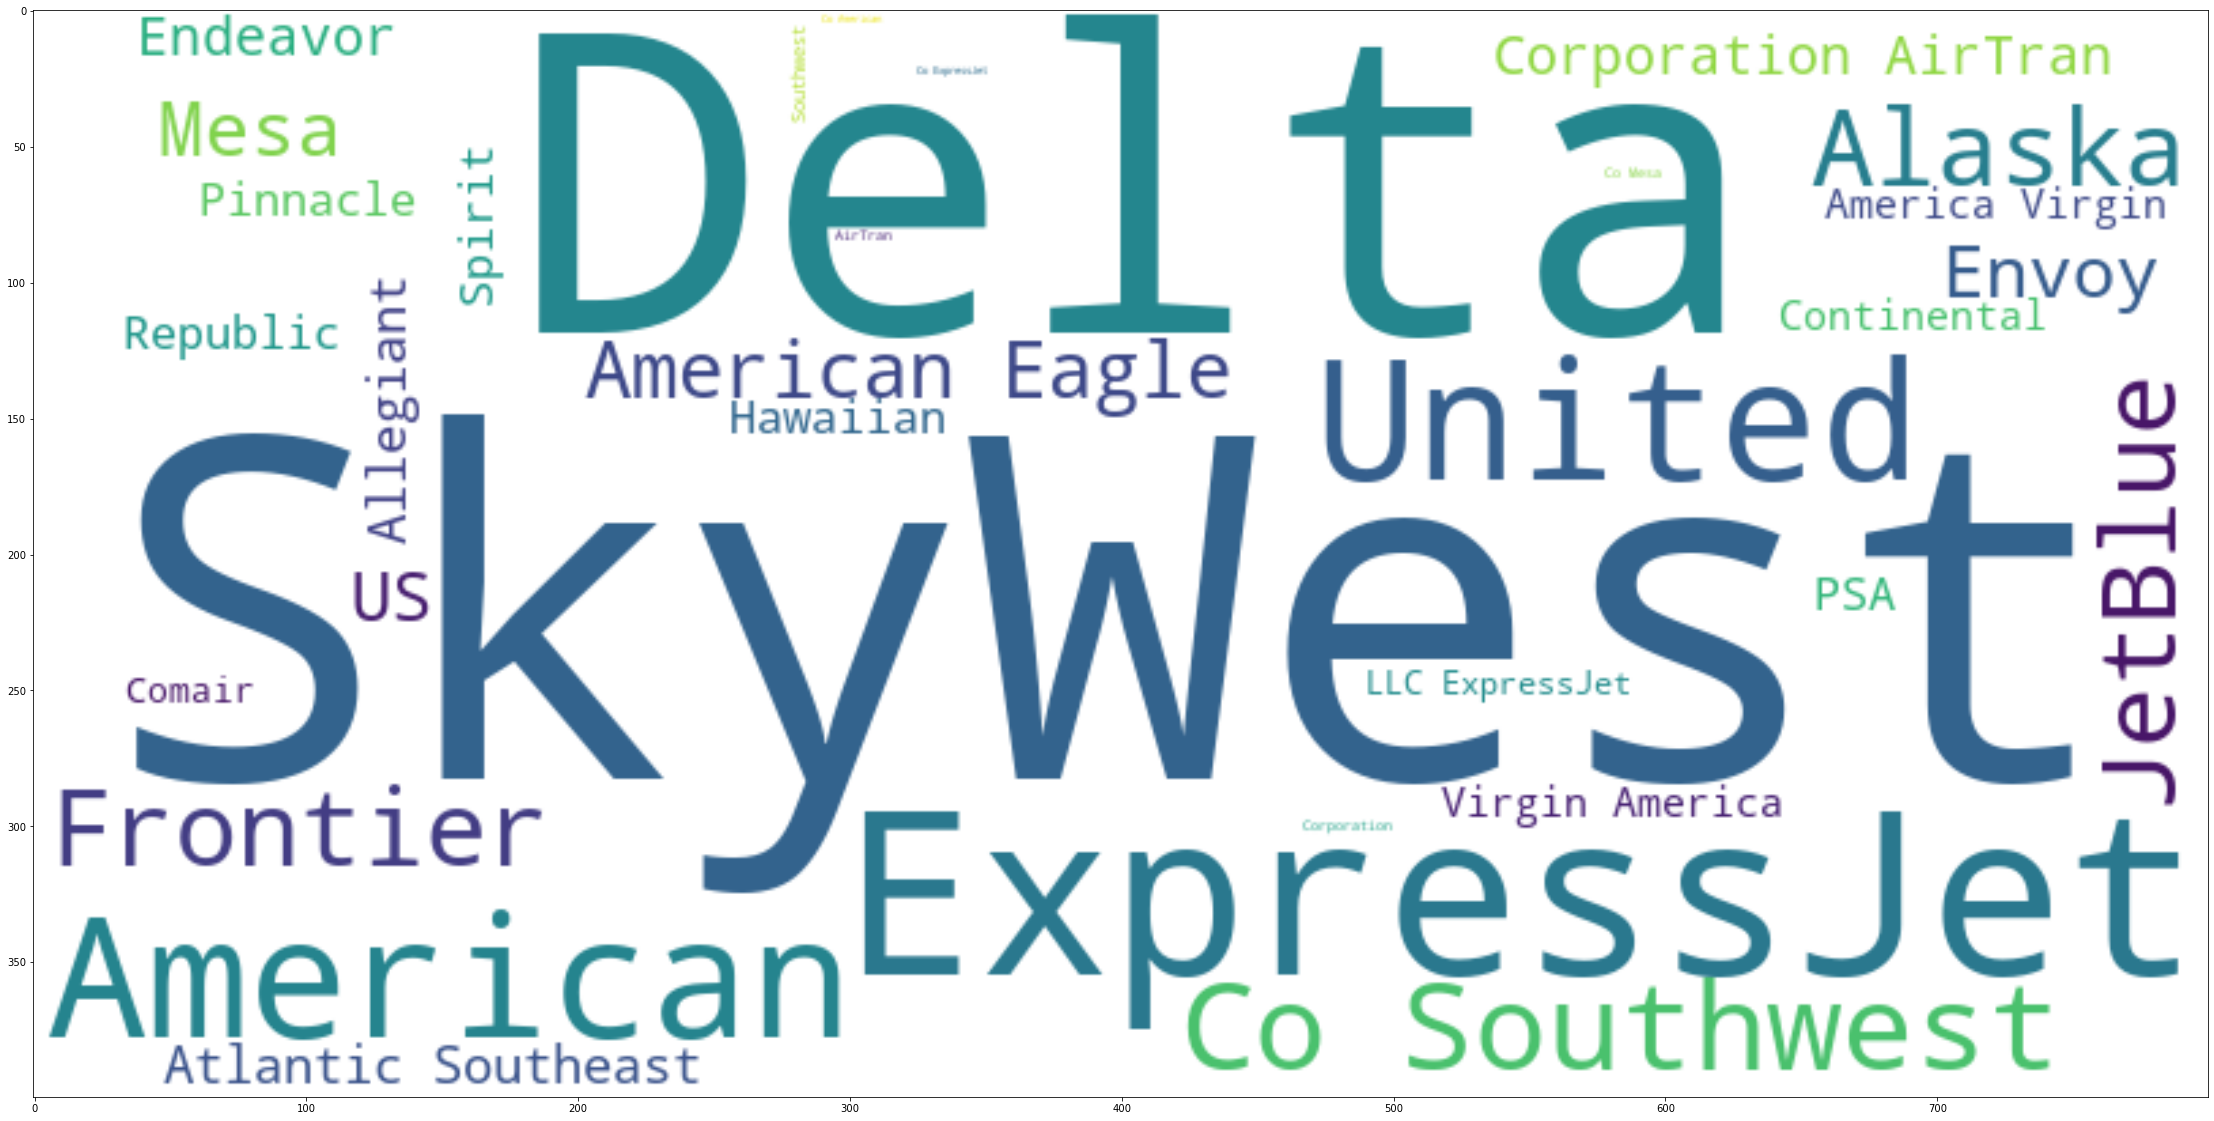

In [75]:
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

### --------------------------------------------------------------------------------------------------- end delays

### Airplanes

In [77]:
airplanes = pd.read_csv('../Data/airplanes.csv')
airplanes.head()

,Name,IATA code,ICAO code
0,Aerospatiale (Nord) 262,ND2,N262
1,Aerospatiale (Sud Aviation) Se.210 Caravelle,CRV,S210
2,Aerospatiale SN.601 Corvette,NDC,S601
3,Aerospatiale/Alenia ATR 42-300,AT4,AT43
4,Aerospatiale/Alenia ATR 42-500,AT5,AT45


In [78]:
airplanes.rename(columns = {'Name':'Plane', 'IATA code':'Plane_IATA','ICAO code':'Plane_ICAO'}, inplace=True)
airplanes.head()

,Plane,Plane_IATA,Plane_ICAO
0,Aerospatiale (Nord) 262,ND2,N262
1,Aerospatiale (Sud Aviation) Se.210 Caravelle,CRV,S210
2,Aerospatiale SN.601 Corvette,NDC,S601
3,Aerospatiale/Alenia ATR 42-300,AT4,AT43
4,Aerospatiale/Alenia ATR 42-500,AT5,AT45


In [79]:
airplanes.isnull().sum()

Plane         0
Plane_IATA    0
Plane_ICAO    0
dtype: int64

### -------------------------------------------------------------------------------- end airplanes

### Routes (not helpful b/c of lack of records - use passengers data instead)

In [80]:
routes = pd.read_csv('../Data/routes.csv')
routes.head()

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2


In [81]:
routes.shape

(67663, 9)

In [82]:
routes.isnull().sum()

Airline                       0
Airline ID                    0
Source airport                0
Source airport ID             0
Destination airport           0
Destination airport ID        0
Codeshare                 53066
Stops                         0
Equipment                    18
dtype: int64

In [83]:
routes.drop('Codeshare', axis=1, inplace=True)
routes.head(1)

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,0,CR2


In [84]:
routes.rename(columns = {'Airline':'Airline_IATA_r', 'Airline ID':'Airline_ID_r', 'Source airport': 'Source_ap_r', 'Source airport ID': 'Source_ap_ID_r', 'Destination airport': 'Dest_ap_r', 'Destination airport ID': 'Dest_ap_ID_r', 'Stops':'Stops_r','Equipment':'Plane_IATA_r'}, inplace=True)
routes.head(1)

,Airline_IATA_r,Airline_ID_r,Source_ap_r,Source_ap_ID_r,Dest_ap_r,Dest_ap_ID_r,Stops_r,Plane_IATA_r
0,2B,410,AER,2965,KZN,2990,0,CR2


### ------------------------------------------------------------------------------------------------------------------- end routes

In [85]:
### Finding Number of Carrier Delays by more than 15 minutes
### Join Airlines with Delays

In [86]:
delays.head(2)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,EV,ExpressJet Airlines LLC,BDL,"Hartford, CT: Bradley International",14.0,4.0,2.00,0.0,...,0.0,2.00,0.0,0.0,114.0,61.0,0.0,0.0,0.0,53.0
1,2019,12,EV,ExpressJet Airlines LLC,BGR,"Bangor, ME: Bangor International",34.0,16.0,4.12,0.0,...,0.0,7.98,2.0,0.0,1450.0,682.0,0.0,231.0,0.0,537.0


In [87]:
delays.carrier_del.unique()

array(['ExpressJet Airlines LLC', 'Frontier Airlines Inc.',
       'Allegiant Air', 'Hawaiian Airlines Inc.', 'Envoy Air',
       'Spirit Air Lines', 'Southwest Airlines Co.', 'Mesa Airlines Inc.',
       'Republic Airline', 'PSA Airlines Inc.', 'SkyWest Airlines Inc.',
       'United Air Lines Inc.', 'Endeavor Air Inc.',
       'American Airlines Inc.', 'Alaska Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.',
       'ExpressJet Airlines Inc.', 'Virgin America', 'US Airways Inc.',
       'AirTran Airways Corporation', 'American Eagle Airlines Inc.',
       'Pinnacle Airlines Inc.', 'Atlantic Southeast Airlines',
       'Continental Air Lines Inc.', 'Comair Inc.'], dtype=object)

In [88]:
delays.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [89]:
airlines.Name_al.unique()

array(['Unknown', 'Private flight', '1Time Airline', ...,
       'Jetgo Australia', 'Air Carnival', 'Svyaz Rossiya'], dtype=object)

In [90]:
airlines.head()

,AirLine_ID_al,Name_al,IATA_al,ICAO_al,Country_al,Active_al
0,-1,Unknown,-,NaN,\N,Y
1,1,Private flight,-,NaN,NaN,Y
3,3,1Time Airline,1T,RNX,South Africa,Y
10,10,40-Mile Air,Q5,MLA,United States,Y
13,13,Ansett Australia,AN,AAA,Australia,Y


In [91]:
delays.isnull().sum()

year_del                 0
month_del                0
al_iata_del              0
carrier_del              0
airport_code_del         0
airport_name_del         0
arr_flights            162
arr_del15              195
carrier_ct             162
weather_ct             162
nas_ct                 162
security_ct            162
late_aircraft_ct       162
arr_cancelled          162
arr_diverted           162
arr_delay              162
carrier_delay          162
weather_delay          162
nas_delay              162
security_delay         162
late_aircraft_delay    162
dtype: int64

In [92]:
delays.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [93]:
airlines.columns

Index(['AirLine_ID_al', 'Name_al', 'IATA_al', 'ICAO_al', 'Country_al',
       'Active_al'],
      dtype='object')

### Merge Airline dataset with Delay dataset

In [94]:
#mergedStuff = pd.merge(df1, df2, on=['Name'], how='inner')
delays_al = delays.merge(airlines, left_on='al_iata_del', right_on='IATA_al', how='left')
delays_al.head(2)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,arr_flights,arr_del15,carrier_ct,weather_ct,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,AirLine_ID_al,Name_al,IATA_al,ICAO_al,Country_al,Active_al
0,2019,12,EV,ExpressJet Airlines LLC,BDL,"Hartford, CT: Bradley International",14.0,4.0,2.00,0.0,...,0.0,0.0,0.0,53.0,452,Atlantic Southeast Airlines,EV,ASQ,United States,Y
1,2019,12,EV,ExpressJet Airlines LLC,BGR,"Bangor, ME: Bangor International",34.0,16.0,4.12,0.0,...,0.0,231.0,0.0,537.0,452,Atlantic Southeast Airlines,EV,ASQ,United States,Y


In [95]:
delays_al.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'arr_flights', 'arr_del15',
       'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
       'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'AirLine_ID_al', 'Name_al', 'IATA_al', 'ICAO_al', 'Country_al',
       'Active_al'],
      dtype='object')

In [96]:
delays_al = delays_al.loc[:, ['year_del', 'month_del', 'al_iata_del', 'carrier_del', 'airport_code_del', 'airport_name_del', 'AirLine_ID_al', 'Name_al', 'IATA_al', 'ICAO_al', 'Country_al', 'Active_al', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct',
       'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled','arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay','nas_delay', 'security_delay', 'late_aircraft_delay']]
delays_al.head(3)

,year_del,month_del,al_iata_del,carrier_del,airport_code_del,airport_name_del,AirLine_ID_al,Name_al,IATA_al,ICAO_al,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019,12,EV,ExpressJet Airlines LLC,BDL,"Hartford, CT: Bradley International",452,Atlantic Southeast Airlines,EV,ASQ,...,0.0,2.00,0.0,0.0,114.0,61.0,0.0,0.0,0.0,53.0
1,2019,12,EV,ExpressJet Airlines LLC,BGR,"Bangor, ME: Bangor International",452,Atlantic Southeast Airlines,EV,ASQ,...,0.0,7.98,2.0,0.0,1450.0,682.0,0.0,231.0,0.0,537.0
2,2019,12,EV,ExpressJet Airlines LLC,BHM,"Birmingham, AL: Birmingham-Shuttlesworth Inter...",452,Atlantic Southeast Airlines,EV,ASQ,...,0.0,2.48,0.0,0.0,572.0,233.0,2.0,206.0,0.0,131.0


In [97]:
#can also use iterrows
#for x in airlines.itertuples():
#    if x[2].find('ExpressJet') != -1:
#        print(x)

In [98]:
#thinking about joining on airline name after filter but expressjet appears to be the only one with a history of changes in delays data
#express = airlines[airlines['Name'].str.contains('ExpressJet')]
#express.head()

In [99]:
delays_al.columns

Index(['year_del', 'month_del', 'al_iata_del', 'carrier_del',
       'airport_code_del', 'airport_name_del', 'AirLine_ID_al', 'Name_al',
       'IATA_al', 'ICAO_al', 'Country_al', 'Active_al', 'arr_flights',
       'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
       'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay'],
      dtype='object')

In [100]:
delays_al_sum = delays_al.groupby(['carrier_del'])['arr_del15'].sum().sort_values(ascending=False).reset_index(name='sum_delays')
delays_al_sum.head(2)

,carrier_del,sum_delays
0,Southwest Airlines Co.,2375572.0
1,American Airlines Inc.,1385103.0


In [101]:
sum_arr_air = delays_al.groupby(['carrier_del'])['arr_flights'].sum().sort_values(ascending=False).reset_index(name='sum_arrivals')
sum_arr_air.head(2)

,carrier_del,sum_arrivals
0,Southwest Airlines Co.,12333317.0
1,Delta Air Lines Inc.,8410684.0


In [102]:
delays_all_airlines = delays_al_sum.merge(sum_arr_air, left_on='carrier_del', right_on='carrier_del', how='left')
delays_all_airlines.head()

,carrier_del,sum_delays,sum_arrivals
0,Southwest Airlines Co.,2375572.0,12333317.0
1,American Airlines Inc.,1385103.0,7080371.0
2,Delta Air Lines Inc.,1230207.0,8410684.0
3,SkyWest Airlines Inc.,1186901.0,6555532.0
4,ExpressJet Airlines Inc.,975862.0,4616917.0


### -----------------------------------------------------------------------------

### Top/Bottom AIRLINE Delay Percentage from 2010-2019

In [103]:
delays_all_airlines['pct_delay'] = delays_all_airlines['sum_delays'] / delays_all_airlines['sum_arrivals']
delays_all_airlines = delays_all_airlines.sort_values(by='pct_delay', ascending=False)
delays_all_airlines.head(10)

,carrier_del,sum_delays,sum_arrivals,pct_delay
25,ExpressJet Airlines LLC,24357.0,97099.0,0.250847
6,JetBlue Airways,613442.0,2588526.0,0.236985
11,Frontier Airlines Inc.,224935.0,952354.0,0.236188
24,Comair Inc.,33739.0,147633.0,0.228533
9,Envoy Air,258846.0,1210352.0,0.213860
23,Allegiant Air,42772.0,201526.0,0.212241
4,ExpressJet Airlines Inc.,975862.0,4616917.0,0.211367
14,Spirit Air Lines,166739.0,793419.0,0.210153
21,Virgin America,79576.0,389060.0,0.204534
7,American Eagle Airlines Inc.,380804.0,1898148.0,0.200619


In [ ]:
text = " ".join(review for review in delays_all_airlines.carrier_del.astype(str))
print ("There are {} words in the combination of all cells in column carrier_del.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(["Airline", "Airlines", "Airways", "Aviation", "Air", "Lines", "Inc", "International"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
plt.axis("off")
plt.figure( figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [114]:
delays_all_al_top10 = delays_all_airlines.nlargest(n=10, columns=['pct_delay'])
delays_all_al_top10.head(11)

,carrier_del,sum_delays,sum_arrivals,pct_delay
25,ExpressJet Airlines LLC,24357.0,97099.0,0.250847
6,JetBlue Airways,613442.0,2588526.0,0.236985
11,Frontier Airlines Inc.,224935.0,952354.0,0.236188
24,Comair Inc.,33739.0,147633.0,0.228533
9,Envoy Air,258846.0,1210352.0,0.213860
23,Allegiant Air,42772.0,201526.0,0.212241
4,ExpressJet Airlines Inc.,975862.0,4616917.0,0.211367
14,Spirit Air Lines,166739.0,793419.0,0.210153
21,Virgin America,79576.0,389060.0,0.204534
7,American Eagle Airlines Inc.,380804.0,1898148.0,0.200619


In [104]:
delays_al.year_del.min()

2010

In [105]:
delays_al.year_del.max()

2019

# -----------------------------------------------------------

### Average & Mean Delays for All AIRLINES

In [78]:
#average
delays_all_airlines.sum_delays.sum() / delays_all_airlines.sum_arrivals.sum()

0.18561005370682257

In [119]:
#mean
delays_all_airlines.pct_delay.mean()

0.19093195931715773

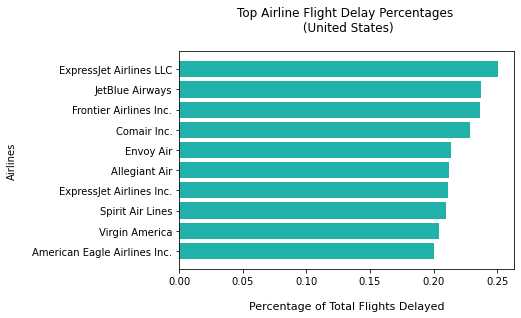

In [148]:
plt.figure(facecolor='white')
plt.barh(delays_all_al_top10['carrier_del'], delays_all_al_top10['pct_delay'],color='lightseagreen')
plt.gca().invert_yaxis()
plt.ylabel('Airlines', fontsize=10, color='black', rotation=90, labelpad=15)
plt.title('Top Airline Flight Delay Percentages \n (United States)', fontsize=12, fontname="Times New Roman Bold", color='black', pad=20)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.xlabel('Percentage of Total Flights Delayed', fontsize=11, color='black', rotation=0, labelpad=15)
#plt.axvline(x=67521, color='r', linestyle='-', label=' U.S. Census \n National Household \n Median Income')
#plt.legend(loc = 'upper right')
plt.savefig('Top10_Delayed_Airlines', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

### --------------------------------------------------------------------------------

In [80]:
#finding month of most airline delays of 15 minutes or more
delays_month = delays_al.groupby(['year_del', 'month_del', 'carrier_del','arr_flights', 'arr_del15'])['arr_del15'].sum().sort_values(ascending=False).reset_index(name='sum_delays')
delays_month.head(10)

,year_del,month_del,carrier_del,arr_flights,arr_del15,sum_delays
0,2013,7,Delta Air Lines Inc.,18649.0,5268.0,5268.0
1,2013,6,Delta Air Lines Inc.,18144.0,4395.0,4395.0
2,2018,6,Delta Air Lines Inc.,21029.0,4176.0,4176.0
3,2014,1,Delta Air Lines Inc.,17071.0,4024.0,4024.0
4,2012,9,American Airlines Inc.,12360.0,3919.0,3919.0
5,2010,7,Delta Air Lines Inc.,14827.0,3904.0,3904.0
6,2018,11,Delta Air Lines Inc.,19820.0,3895.0,3895.0
7,2010,6,Delta Air Lines Inc.,14537.0,3835.0,3835.0
8,2014,6,American Airlines Inc.,13503.0,3818.0,3818.0
9,2019,5,American Airlines Inc.,13392.0,3714.0,3714.0


### Merge Passengers with Routes --- Passengers have year & month data

In [81]:
routes.columns

Index(['Airline_IATA_r', 'Airline_ID_r', 'Source_ap_r', 'Source_ap_ID_r',
       'Dest_ap_r', 'Dest_ap_ID_r', 'Stops_r', 'Plane_IATA_r'],
      dtype='object')

In [82]:
routes.dtypes

Airline_IATA_r    object
Airline_ID_r      object
Source_ap_r       object
Source_ap_ID_r    object
Dest_ap_r         object
Dest_ap_ID_r      object
Stops_r            int64
Plane_IATA_r      object
dtype: object

In [83]:
passengers.columns

Index(['YEAR', 'MONTH', 'Sum_PASSENGERS', 'AIRLINE_ID', 'CARRIER_NAME',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM',
       'ORIGIN_COUNTRY', 'ORIGIN_COUNTRY_NAME', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'DEST_COUNTRY', 'DEST_COUNTRY_NAME'],
      dtype='object')

In [84]:
passengers.dtypes

YEAR                    int64
MONTH                   int64
Sum_PASSENGERS          int64
AIRLINE_ID             object
CARRIER_NAME           object
ORIGIN                 object
ORIGIN_CITY_NAME       object
ORIGIN_STATE_ABR       object
ORIGIN_STATE_NM        object
ORIGIN_COUNTRY         object
ORIGIN_COUNTRY_NAME    object
DEST                   object
DEST_CITY_NAME         object
DEST_STATE_ABR         object
DEST_STATE_NM          object
DEST_COUNTRY           object
DEST_COUNTRY_NAME      object
dtype: object

In [98]:
# Joining routes doesn't help mainly because of lack of records, Airline ID is known (airline IATA would be nice),
routes.tail(1)

,Airline_IATA_r,Airline_ID_r,Source_ap_r,Source_ap_ID_r,Dest_ap_r,Dest_ap_ID_r,Stops_r,Plane_IATA_r
67662,ZM,19016,OSS,2913,FRU,2912,0,734


In [86]:
passengers.tail(1)

,YEAR,MONTH,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,ORIGIN_COUNTRY_NAME,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_NM,DEST_COUNTRY,DEST_COUNTRY_NAME
6278580,2020,6,1,22048,Concierge U Ltd. d/b/a Jet Concierge Club,BOS,"Boston, MA",MA,Massachusetts,US,United States,FOK,"Westhampton, NY",NY,New York,US,United States


In [94]:
pass_routes = passengers.merge(routes, left_on=['AIRLINE_ID', 'ORIGIN', 'DEST'], right_on=['Airline_ID_r', 'Source_ap_r', 'Dest_ap_r'],  how='left')
pass_routes.head(2)

,YEAR,MONTH,Sum_PASSENGERS,AIRLINE_ID,CARRIER_NAME,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ORIGIN_COUNTRY,...,DEST_COUNTRY,DEST_COUNTRY_NAME,Airline_IATA_r,Airline_ID_r,Source_ap_r,Source_ap_ID_r,Dest_ap_r,Dest_ap_ID_r,Stops_r,Plane_IATA_r
0,2015,3,0,0,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,...,US,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,4,0,0,NaN,AEX,"Alexandria, LA",LA,Louisiana,US,...,US,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
passengers.shape

(4892512, 17)

In [92]:
routes.shape

(67663, 8)

In [93]:
pass_routes.shape

(4892512, 25)